# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [3]:
# Check series data types.
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type.
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# Total number of rides.
total_rides = pyber_data_df.count()["ride_id"]
total_rides

2375

In [6]:
# 2. Get the total drivers for each city type from the city DataFrame.
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
# Total number of drivers.
total_drivers = city_data_df.sum()["driver_count"]
total_drivers

2973

In [8]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Total of all fares.
total_fares = pyber_data_df.sum()["fare"]
total_fares

63538.64

In [10]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_type = total_fares_by_type / total_rides_by_type 
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 
avg_fare_by_driver = total_fares_by_type / total_drivers_by_type
avg_fare_by_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
#  6. Create a PyBer summary DataFrame. Type is the index for the DataFrame. pyber_summary_df = pyber_data_df.set_index(["type"])
pyber_summary_df = pd.DataFrame ({
    "Total Rides": total_rides_by_type, 
    "Total Drivers": total_drivers_by_type, 
    "Total Fares": total_fares_by_type,
    "Average Fare per Ride": avg_fare_by_type,
    "Average Fare per Driver": avg_fare_by_driver})
     
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name. Index name is already not present.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
# 8. Format the columns.
#pyber_summary_df["type"] = pyber_summary_df["type"].map("{:.1f}".format) 
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625",2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
print(pyber_summary_df)

         Total Rides  Total Drivers Total Fares Average Fare per Ride  \
Rural            125             78   $4,327.93                $34.62   
Suburban         625            490  $19,356.33                $30.97   
Urban          1,625           2405  $39,854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                  $39.50  
Urban                     $16.57  


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
# for each date where the indices are the city type and date.
fare_by_date_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]
fare_by_date_df

date              type    
2019-01-01 0:08   Urban       37.91
2019-01-01 0:46   Suburban    47.74
2019-01-01 12:32  Suburban    25.56
2019-01-01 14:40  Urban        5.42
2019-01-01 14:42  Urban       12.31
                              ...  
2019-05-08 1:54   Urban       32.69
2019-05-08 2:31   Urban       41.33
2019-05-08 4:20   Urban       21.99
2019-05-08 4:39   Urban       18.45
2019-05-08 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_date_df = fare_by_date_df.reset_index()
fare_by_date_df.head(10)

,date,type,fare
0,2019-01-01 0:08,Urban,37.91
1,2019-01-01 0:46,Suburban,47.74
2,2019-01-01 12:32,Suburban,25.56
3,2019-01-01 14:40,Urban,5.42
4,2019-01-01 14:42,Urban,12.31
5,2019-01-01 14:52,Suburban,31.15
6,2019-01-01 17:22,Urban,42.11
7,2019-01-01 21:04,Urban,11.71
8,2019-01-01 2:07,Suburban,24.07
9,2019-01-01 3:46,Urban,7.57


In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_type_pivot = fare_by_date_df.pivot(index="date", columns="type", values="fare")
fare_by_type_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
2019-01-01 14:52,NaN,31.15,NaN
2019-01-01 17:22,NaN,NaN,42.11
2019-01-01 21:04,NaN,NaN,11.71
2019-01-01 2:07,NaN,24.07,NaN


In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_Apr_df = fare_by_type_pivot.loc["2019-01-01":"2019-04-29"]
fares_Jan_Apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_Jan_Apr_df.index = pd.to_datetime(fares_Jan_Apr_df.index)



In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_Apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_Apr_df.resample("W").sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


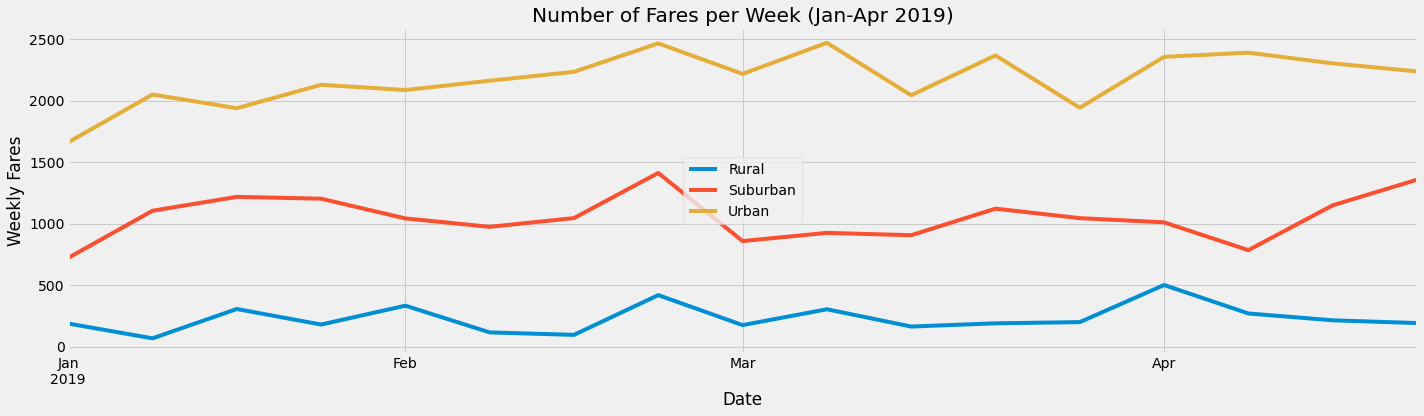

In [28]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_fares = weekly_fares_df.plot(figsize = (20, 6))
weekly_fares.set_title("Number of Fares per Week (Jan-Apr 2019)")
weekly_fares.set_xlabel("Date")
weekly_fares.set_ylabel("Weekly Fares")
#weekly_fares.set_yticks(np.arange(0, 120, step=10.0))
weekly_fares.legend()

plt.tight_layout()
plt.savefig("analysis/pyber_fare_summary.png")
plt.show()